In [1]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Data Preparation

In [37]:
data = pd.read_csv(r"C:\Users\phana\VS Code\TensorFlow-Car Price Prediction\train.csv", sep= ",")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
data.shape

(1000, 12)

In [4]:
#sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [5]:
tensor_data = tf.constant(data) #Convert the data to a tensor to use in tensorflow and for efficient computation
tensor_data = tf.cast(tensor_data, tf.float32) #Cast the tensor to float32 to avoid any compatibility issues, increase accuracy and for efficient computation
#if infinities are present in the data after casting, it is probably because of the float type used while casting ( not enough bits to store the number )
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [6]:
tensor_data = tf.random.shuffle(tensor_data) #shuffle the data to avoid any bias in the model
print(tensor_data[:5])

tf.Tensor(
[[9.700000e+02 5.322320e+05 7.775240e+05 7.000000e+00 8.425200e+04
  2.000000e+00 6.000000e+00 1.300000e+01 1.640000e+02 9.500000e+01
  7.000000e+01 3.136195e+05]
 [8.090000e+02 6.405090e+05 7.498930e+05 5.000000e+00 1.434100e+05
  1.000000e+00 7.000000e+00 9.000000e+00 1.790000e+02 8.000000e+01
  1.200000e+02 1.286325e+05]
 [6.630000e+02 6.288550e+05 8.719680e+05 3.000000e+00 8.998600e+04
  1.000000e+00 9.000000e+00 8.000000e+00 1.510000e+02 1.070000e+02
  1.020000e+02 4.200830e+05]
 [3.660000e+02 5.477690e+05 8.874990e+05 7.000000e+00 1.357910e+05
  5.000000e+00 9.000000e+00 1.000000e+01 1.430000e+02 1.040000e+02
  1.010000e+02 1.973775e+05]
 [9.200000e+02 5.218590e+05 7.079390e+05 5.000000e+00 9.755700e+04
  3.000000e+00 3.000000e+00 1.200000e+01 1.940000e+02 6.700000e+01
  8.100000e+01 2.235945e+05]], shape=(5, 12), dtype=float32)


In [7]:
X = tensor_data[:,3:-1] 
#Since we dont need to take into account id, on road old and on road now features, we take all the columns from 3rd to 2nd last. Last column is the output
print(X[:5])

tf.Tensor(
[[7.00000e+00 8.42520e+04 2.00000e+00 6.00000e+00 1.30000e+01 1.64000e+02
  9.50000e+01 7.00000e+01]
 [5.00000e+00 1.43410e+05 1.00000e+00 7.00000e+00 9.00000e+00 1.79000e+02
  8.00000e+01 1.20000e+02]
 [3.00000e+00 8.99860e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.51000e+02
  1.07000e+02 1.02000e+02]
 [7.00000e+00 1.35791e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.43000e+02
  1.04000e+02 1.01000e+02]
 [5.00000e+00 9.75570e+04 3.00000e+00 3.00000e+00 1.20000e+01 1.94000e+02
  6.70000e+01 8.10000e+01]], shape=(5, 8), dtype=float32)


In [8]:
X.shape

TensorShape([1000, 8])

In [9]:
y = tensor_data[:,-1]
print(y[:5].shape)
#shape is originally (5,) but we need it to be (5,1) to be able to use it in the model since X is a 2D tensor
y = tf.expand_dims(y, axis = -1) #since the output is a single value, we need to expand the dimensions to make it a 2D tensor
print(y[:5])

(5,)
tf.Tensor(
[[313619.5]
 [128632.5]
 [420083. ]
 [197377.5]
 [223594.5]], shape=(5, 1), dtype=float32)


+ Example: How normalization works

In [10]:
#To pass the mean and variance to the normalization layer, we need to make sure the dimensions are the same as the input
mean = tf.fill([5,], 5)
variance = tf.fill([5,], 4)

normalizer = Normalization(axis = -1, mean = mean, variance = variance)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [11]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)  #adapt a new normalization layer ( Calculate the mean and variance ) to the data above ( axis by default is - 1)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

+ Normalizing the input data

In [12]:
normalizer = Normalization()
normalizer.adapt(X) #adapt the normalization layer to the input data
normalizer(X) #normalize the input data

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 1.4194926 , -0.54992086, -0.70466214, ..., -0.15006201,
         0.50978523, -1.5879278 ],
       [ 0.2554971 ,  1.4804964 , -1.417883  , ...,  0.62799746,
        -0.22168376,  0.78757405],
       [-0.90849847, -0.35311887, -1.417883  , ..., -0.8243802 ,
         1.0949605 , -0.06760662],
       ...,
       [ 1.4194926 , -1.3315687 ,  0.7217796 , ..., -0.3056739 ,
        -1.4407988 , -1.3503777 ],
       [-1.4904962 ,  0.31502634,  1.4350004 , ..., -0.40941516,
         0.70484364,  0.07492349],
       [-1.4904962 ,  1.3404629 ,  0.7217796 , ...,  1.250445  ,
        -0.61180055,  0.9776142 ]], dtype=float32)>

In [13]:
print(X[:5])

tf.Tensor(
[[7.00000e+00 8.42520e+04 2.00000e+00 6.00000e+00 1.30000e+01 1.64000e+02
  9.50000e+01 7.00000e+01]
 [5.00000e+00 1.43410e+05 1.00000e+00 7.00000e+00 9.00000e+00 1.79000e+02
  8.00000e+01 1.20000e+02]
 [3.00000e+00 8.99860e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.51000e+02
  1.07000e+02 1.02000e+02]
 [7.00000e+00 1.35791e+05 5.00000e+00 9.00000e+00 1.00000e+01 1.43000e+02
  1.04000e+02 1.01000e+02]
 [5.00000e+00 9.75570e+04 3.00000e+00 3.00000e+00 1.20000e+01 1.94000e+02
  6.70000e+01 8.10000e+01]], shape=(5, 8), dtype=float32)


In [14]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [15]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))  #Convert tensors to dataset object
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)    #Shuffle the data

In [17]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [18]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [20]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [21]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4185772 , -0.54918385, -0.7020319 ,  0.12899227,  0.5736926 ,
        -0.15890498,  0.5158583 , -1.6021148 ],
       [ 0.2564043 ,  1.4827895 , -1.4120516 ,  0.48239598, -1.2103853 ,
         0.6219535 , -0.21189855,  0.7827829 ],
       [-0.9057686 , -0.35223103, -1.4120516 ,  1.1892034 , -1.6564049 ,
        -0.835649  ,  1.0980637 , -0.07578026],
       [ 1.4185772 ,  1.2210902 ,  1.428027  ,  1.1892034 , -0.76436585,
        -1.2521068 ,  0.9525124 , -0.12347821],
       [ 0.2564043 , -0.09218049,  0.00798773, -0.93121886,  0.12767313,
         1.402812  , -0.84262115, -1.0774373 ]], dtype=float32)>

# Modelling

In [22]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

c:\Users\phana\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [23]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# Error sanctioning

In [24]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [25]:
val_dataset #Val dataset has shape ( None,None,8 ) which is inappropriate for the model

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None))>

In [26]:
tf.experimental.numpy.experimental_enable_numpy_behavior()  # Enable numpy behaviour for reshape

In [27]:
# Reshape the input data to have the correct shape
X_val_reshaped = X_val.reshape(-1, 8)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_reshaped, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [28]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 236909.8281 - root_mean_squared_error: 274087.2500 - val_loss: 74374.8125 - val_root_mean_squared_error: 96295.4531
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56984.2148 - root_mean_squared_error: 69969.7578 - val_loss: 47809.1445 - val_root_mean_squared_error: 59171.2031
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44339.5273 - root_mean_squared_error: 55948.8477 - val_loss: 41916.0469 - val_root_mean_squared_error: 50445.5547
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41526.2500 - root_mean_squared_error: 52276.0234 - val_loss: 41048.2148 - val_root_mean_squared_error: 48357.8359
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37514.2031 - root_mean_squared_error: 47716.4336 - val_loss: 58432.5391 - val_root_mean_squared_error: 73187.1875
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50229.8828 - root_mean_squared_error: 62425.9961 - val_loss: 44399.4688 - 

# Training and Optimization

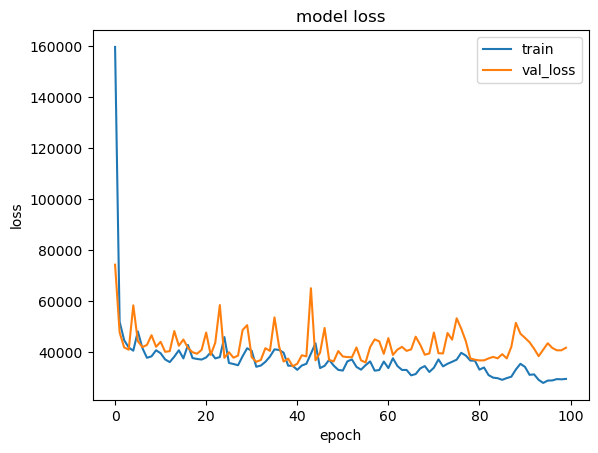

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

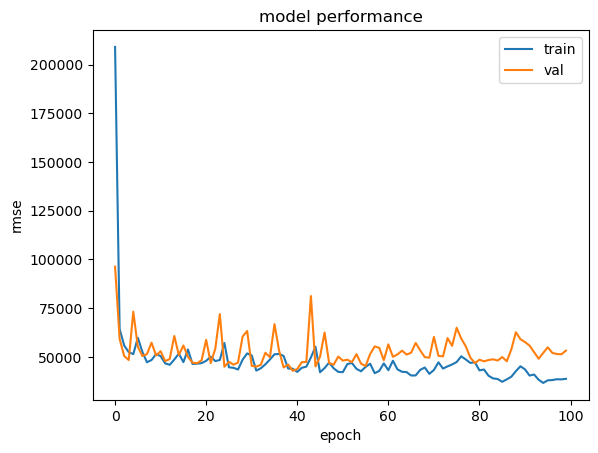

In [30]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Model Evaluation and Testing

In [31]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42746.0508 - root_mean_squared_error: 51144.4570 


[43694.30859375, 53398.12890625]

In [32]:
X_test.shape

TensorShape([100, 8])

In [33]:
y_test[0]   #shape is (1,) but we dont need it to be a 2D tensor

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([486308.5], dtype=float32)>

In [34]:
y_true = list(y_test[:,0].numpy())  #Convert the tensor to a list ((:,0) to remove the extra dimension)

In [35]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[531353.7, 497542.0, 211598.14, 154074.08, 177359.64, 238998.97, 153150.8, 290028.4, 139692.11, 260577.72, 282935.4, 481082.97, 366254.53, 402415.16, 412538.34, 573874.2, 536580.75, 200315.84, 223605.05, 519026.3, 529198.3, 146152.7, 252543.31, 401601.78, 316241.34, 291294.66, 218014.48, 244515.19, 206984.08, 96176.445, 448619.72, 384437.7, 482526.2, 255313.75, 334234.34, 180662.69, 242152.44, 327584.34, 316710.44, 313238.6, 182085.02, 100174.1, 422522.72, 317397.28, 337670.53, 131074.98, 344869.7, 315420.72, 366625.97, 210319.22, 464492.47, 508304.9, 117841.67, 329034.16, 470486.47, 450253.94, 436505.4, 563301.44, 151695.34, 374752.1, 346296.34, 490330.22, 536570.25, 375901.84, 522964.8, 439433.34, 296746.3, 203031.0, 209538.16, 149543.92, 146532.11, 135343.7, 573504.0, 374744.34, 383229.4, 319173.84, 517507.66, 131014.68, 477616.9, 215328.98, 476912.22, 454009.03, 291828.38, 430531.06, 72820.35, 257775.02, 331689.12, 82888.56, 220514.08, 471832.4

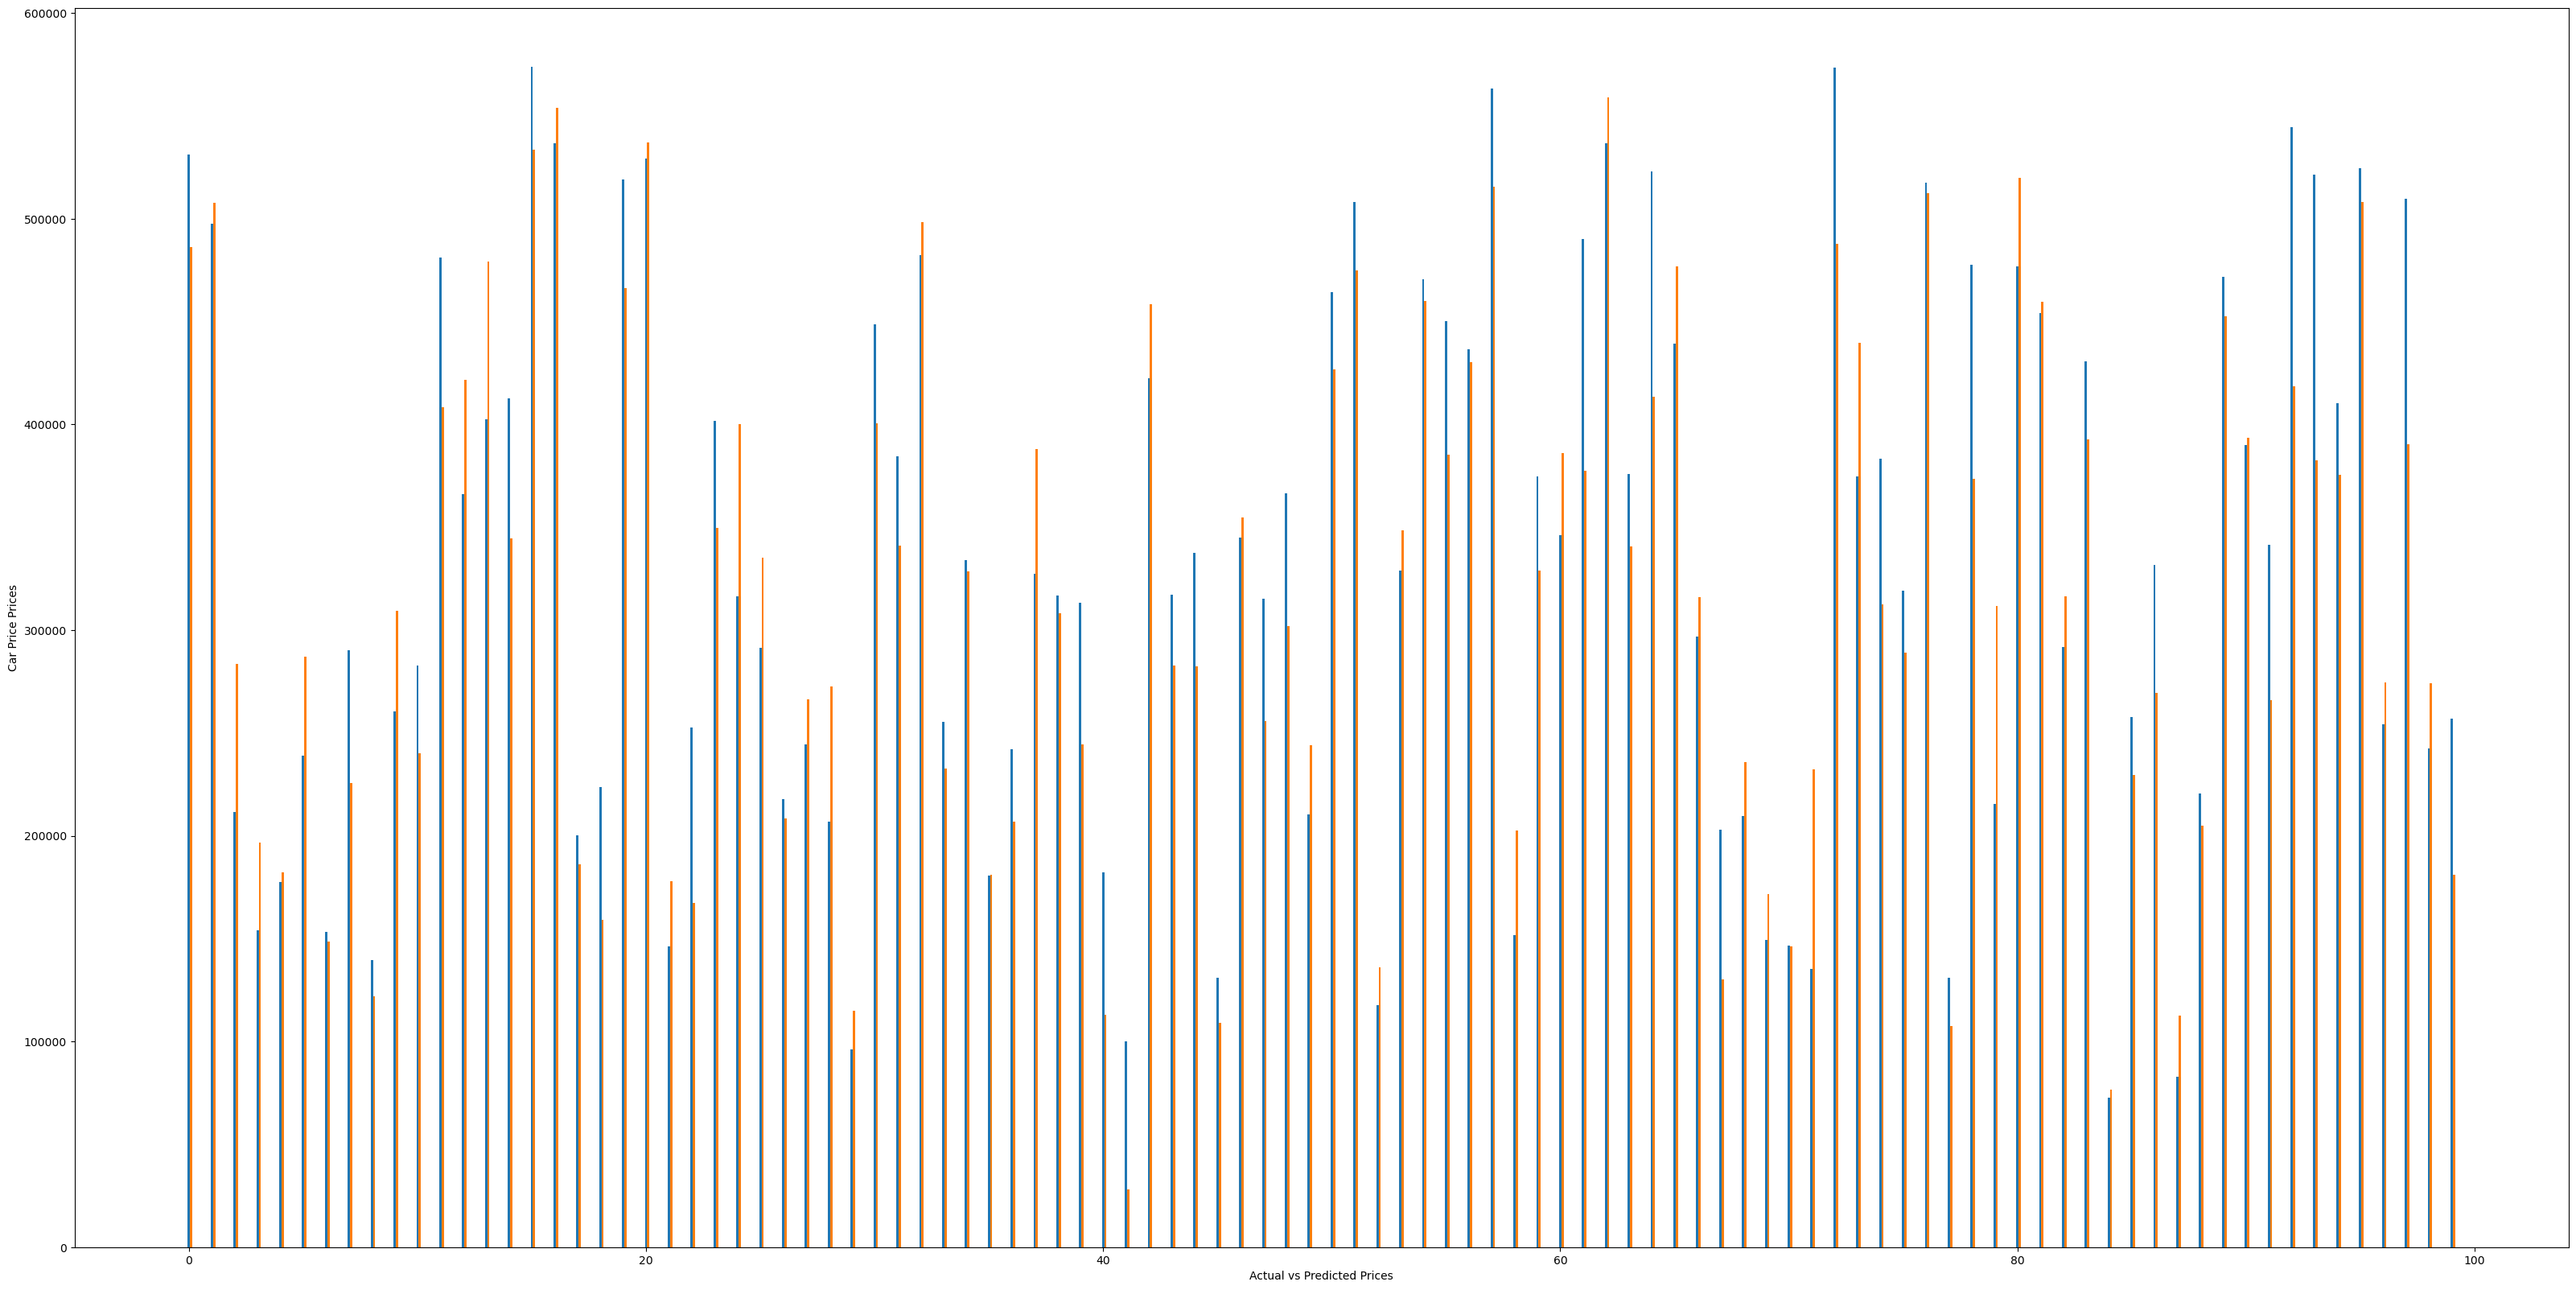

In [36]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()